##SCRYPTS DEDICADOS AL ANALISIS EXPLORATORIO DE DATOS 

OBJETIVOS : ETL , ESTANDARIZACION , FILTRADO 



In [139]:
import sys
import os

# Ruta absoluta del proyecto
project_path = os.path.abspath("..")

# Agregar la carpeta /src al PythonPath
src_path = os.path.join(project_path, "src")
sys.path.append(src_path)

# Ahora sí puedes importar tu módulo
from Funciones.utils import load_Rawdata   # o la función que necesites


In [140]:
#CARGAR DATOS 
dataframe = load_Rawdata("../Data/01-raw")
print(f"el dataframe contiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas")
dataframe.info()


el dataframe contiene 27549 filas y 10 columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Data columns (total 10 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   PROSPECTOS.Fuente                                                     2437 non-null   object 
 1   NIT                                                                   27549 non-null  int64  
 2   Nit-Razon Social                                                      27549 non-null  object 
 3   Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)  27548 non-null  object 
 4   UT                                                                    2437 non-null   float64
 5   02.Ingreso Actividades Ordinarias                                     26580 non-null  object 
 6   02.Promedio de Ingreso Actividades Ordinarias 

In [141]:
dataframe.copy()   # Crear una copia del DataFrame original

dataframe=dataframe.iloc[:, :7] #seleccionar las columnas que se desean analizar

# Eliminar columna específica
dataframe.drop(columns=['02.Ingreso Actividades Ordinarias'], inplace=True) 


dataframe.info()  # Obtener estadísticas descriptivas del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Data columns (total 6 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   PROSPECTOS.Fuente                                                     2437 non-null   object 
 1   NIT                                                                   27549 non-null  int64  
 2   Nit-Razon Social                                                      27549 non-null  object 
 3   Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)  27548 non-null  object 
 4   UT                                                                    2437 non-null   float64
 5   02.Promedio de Ingreso Actividades Ordinarias                         26580 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ MB


In [142]:
#Poner en minusculas los nombres de las columnas
dataframe.columns = [col.lower() for col in dataframe.columns]
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Data columns (total 6 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   prospectos.fuente                                                     2437 non-null   object 
 1   nit                                                                   27549 non-null  int64  
 2   nit-razon social                                                      27549 non-null  object 
 3   clasificación industrial internacional uniforme versión 4 a.c (ciiu)  27548 non-null  object 
 4   ut                                                                    2437 non-null   float64
 5   02.promedio de ingreso actividades ordinarias                         26580 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ MB


prospectos.fuente                                                       25112
nit                                                                         0
nit-razon social                                                            0
clasificación industrial internacional uniforme versión 4 a.c (ciiu)        1
ut                                                                      25112
02.promedio de ingreso actividades ordinarias                             969
dtype: int64


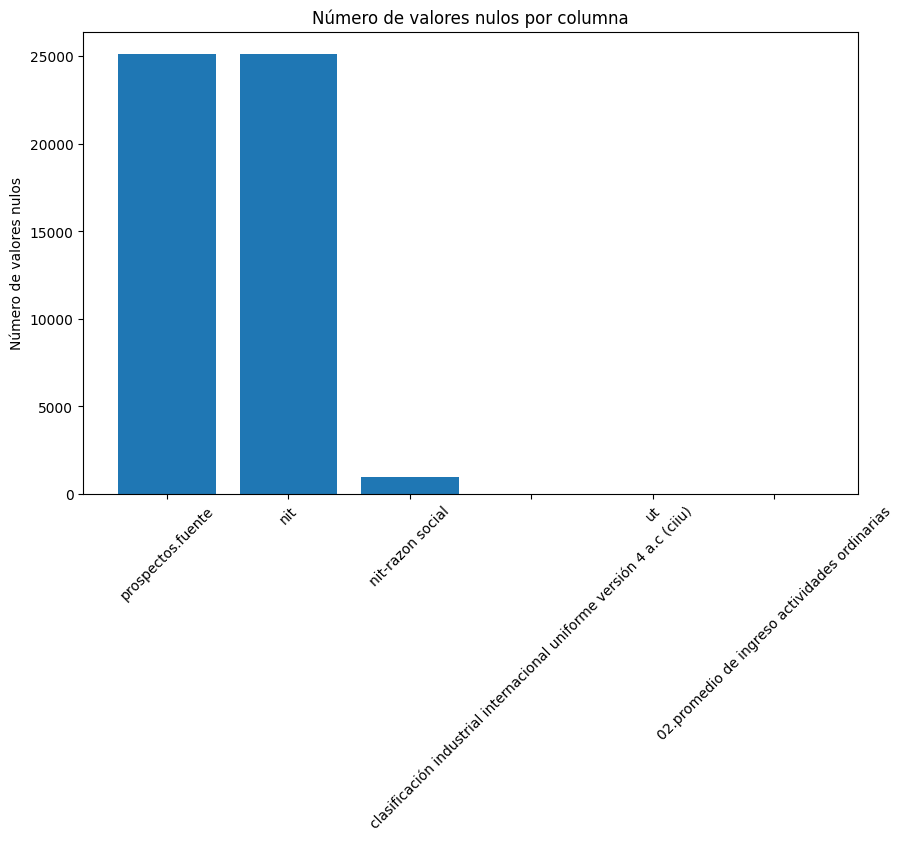

In [143]:
#============================Contar y graficar los nulos
print(dataframe.isnull().sum())
#Visualizar en barras los nulos
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title("Número de valores nulos por columna")
plt.ylabel("Número de valores nulos")
#ordenar las barras de mayor a menor
plt.bar(dataframe.columns, dataframe.isnull().sum().sort_values(ascending=False))
plt.show()



In [144]:
##===========================Filtrar dataset para analisis estadistico  descriptivo

# Eliminar filas con valores nulos, dataframe filtrado y listo para modelado en machine learning

dataframe_filtered = dataframe.dropna()  # Eliminar filas con valores nulos
dataframe_filtered.isnull().sum()  # Verificar que no haya valores nulos
dataframe_filtered.describe()  # Estadísticas descriptivas del DataFrame filtrado
dataframe_filtered.shape
dataframe_filtered.head()

dataframe_filtered.rename(columns={
    '02.promedio de ingreso actividades ordinarias': 'ventas',
    'prospectos.fuente':'fuente',
    'clasificación industrial internacional uniforme versión 4 a.c (ciiu)':'Sector'}, inplace=True)



C:\Users\DPEREZ\AppData\Local\Temp\ipykernel_41800\226004959.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_filtered.rename(columns={


In [145]:
dataframe_filtered['ventas']=dataframe_filtered['ventas'].astype(str).str.replace(r'\$', '', regex=True)
dataframe_filtered['ventas']=pd.to_numeric(dataframe_filtered['ventas'], errors='coerce')
dataframe_filtered.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2396 entries, 0 to 24803
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fuente            2396 non-null   object 
 1   nit               2396 non-null   int64  
 2   nit-razon social  2396 non-null   object 
 3   Sector            2396 non-null   object 
 4   ut                2396 non-null   float64
 5   ventas            2396 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 131.0+ KB


C:\Users\DPEREZ\AppData\Local\Temp\ipykernel_41800\862330265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_filtered['ventas']=dataframe_filtered['ventas'].astype(str).str.replace(r'\$', '', regex=True)
C:\Users\DPEREZ\AppData\Local\Temp\ipykernel_41800\862330265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_filtered['ventas']=pd.to_numeric(dataframe_filtered['ventas'], errors='coerce')


In [146]:
#filtro de ut = 0
dataframe_filtered = dataframe_filtered[dataframe_filtered['ut'] != 0 ]
dataframe_filtered = dataframe_filtered[dataframe_filtered['ventas'] != 0 ]
dataframe_filtered.head(15).sort_values(by='ut', ascending=True)
dataframe_filtered.shape

print(dataframe_filtered['ut'].min())
print(dataframe_filtered['ut'].max())
print(dataframe_filtered['ventas'].min())
print(dataframe_filtered['ventas'].max())

1.0
14029.0
4
11177357


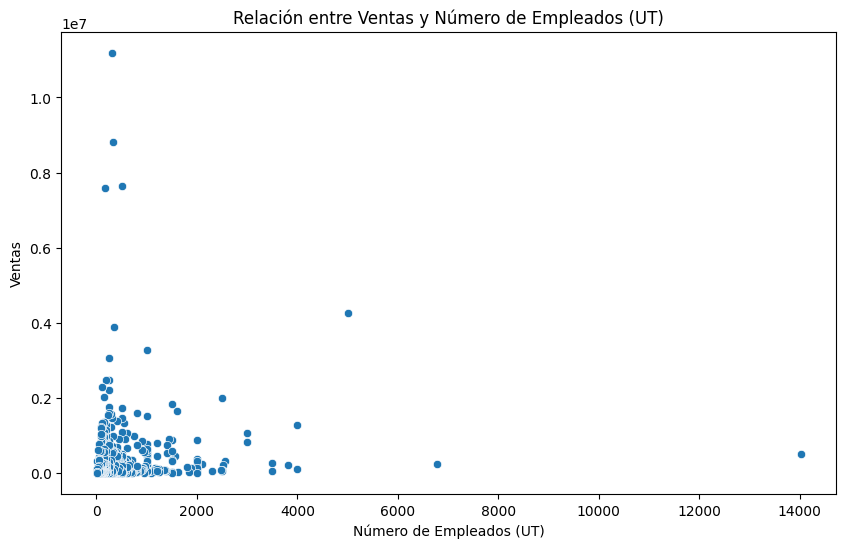

In [ ]:

#Scatter plot de ventas vs numero de empleados mostrar un grafico por cada sector


plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe_filtered, x='ut', y='ventas')
plt.title("Relación entre Ventas y Número de Empleados (UT)")
plt.xlabel("Número de Empleados (UT)")
plt.ylabel("Ventas")
plt.show()



In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(dataframe_filtered, col="Sector", col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x="ut", y="ventas")

g.set_axis_labels("Número de Empleados (UT)", "Ventas")
g.fig.suptitle("Relación entre Ventas y UT por Sector", fontsize=14, y=1.03)

plt.show()


In [127]:
#guardar el dataframe filtrado en un archivo csv
dataframe_filtered.to_csv("../Data/02-Preprocessed/Datamodelar.csv", index=False)

In [138]:

dataframe_filtered['Sector'].value_counts().nunique()
#filtra solo los sectores con mas de 50 empresas
dataframe_filtered = dataframe_filtered.groupby('Sector').filter(lambda x: len(x) > 1)
dataframe_filtered['Sector'].value_counts()

Sector
G4645 - Comercio al por mayor de productos farmacéuticos, medicinales, cosméticos y de tocador                         67
C1410 - Confección de prendas de vestir, excepto prendas de piel                                                       58
J6201 - Actividades de desarrollo de sistemas informáticos (planificación, análisis, diseño, programación, pruebas)    53
F4111 - Construcción de edificios residenciales                                                                        51
Name: count, dtype: int64

Guardar datos para hacer las prediciones despues



In [ ]:
#================================ Dataset para las prediciones futuras
dataframe_prediccion = dataframe.copy()
dataframe_prediccion.rename(columns={
    '02.promedio de ingreso actividades ordinarias': 'ventas',
    'prospectos.fuente':'fuente',
    'clasificación industrial internacional uniforme versión 4 a.c (ciiu)':'Sector'}, inplace=True)

dataframe_prediccion.head()
print(f" El dataset original contiene {dataframe_prediccion.shape[0]} filas y {dataframe_prediccion.shape[1]} columnas ")
dataframe_prediccion.isnull().sum()  # Verificar valores nulos



#filtrar los no vacios de la columna promedio de ingresos
dataframe_prediccion = dataframe_prediccion[dataframe_prediccion['ventas'].notna()]
print(f" El dataset para predicciones futuras contiene {dataframe_prediccion.shape[0]} filas y {dataframe_prediccion.shape[1]} columnas ")
dataframe_prediccion.isnull().sum()  # Verificar valores nulos

#Filtrar solo los valores nulos de las columnas que se usaran para predecir el tamaño de la UT
dataframe_prediccion = dataframe_prediccion[dataframe_prediccion['ut'].isna()]
print(f" El dataset para predicciones futuras contiene {dataframe_prediccion.shape[0]} filas y {dataframe_prediccion.shape[1]} columnas ")

 El dataset original contiene 27549 filas y 6 columnas 
 El dataset para predicciones futuras contiene 26580 filas y 6 columnas 
 El dataset para predicciones futuras contiene 24184 filas y 6 columnas 


In [ ]:
import pandas as pd

dataframe_prediccion.reset_index(drop=True, inplace=True)
dataframe_prediccion.head()

# Limpiar la columna 'ventas' (quitar $ y comas) y convertir a numérico
dataframe_prediccion['ventas'] = dataframe_prediccion['ventas'].astype(str).str.replace(r'[\$,]', '', regex=True)
dataframe_prediccion['ventas'] = pd.to_numeric(dataframe_prediccion['ventas'], errors='coerce')

# Agrupar por 'Sector' y calcular la media de ventas
grouped_mean_ventas = dataframe_prediccion.groupby('Sector')['ventas'].mean().sort_values(ascending=False)
grouped_mean_ventas

dataframe_prediccion.sort_values(by='ventas', ascending=True)

,fuente,nit,nit-razon social,Sector,ut,ventas
24174,NaN,901489838,901489838 - Ascenty Colombia S.A.S,"J6311 - Procesamiento de datos, alojamiento (h...",NaN,0
19056,NaN,900913341,900913341 - Nuevo Aeropuerto De Barranquilla S...,F4290 - Construcción de otras obras de ingenie...,NaN,0
19058,NaN,900913634,900913634 - Castel Capital Sas,L6810 - Actividades inmobiliarias realizadas c...,NaN,0
12897,NaN,900305592,900305592 - Monexport Ci Sas,L6810 - Actividades inmobiliarias realizadas c...,NaN,0
11620,NaN,900192328,900192328 - Chairama Sas,S9609 - Otras actividades de servicios persona...,NaN,0
...,...,...,...,...,...,...
4373,NaN,830028931,830028931 - Samsung Electronics Colombia S.A.,"G4652 - Comercio al por mayor de equipo, parte...",NaN,3539502
13281,NaN,900331322,900331322 - Verano Energy (Switzerland) Ag Suc...,B0610 - Extracción de petróleo crudo,NaN,3783380
19473,NaN,901010918,901010918 - Distesa Colombia Sas,"G4741 - Comercio al por menor de computadores,...",NaN,4186274
16944,NaN,900585067,900585067 - C.I. Trafigura Petroleum Colombia ...,G4661 - Comercio al por mayor de combustibles ...,NaN,4680704


In [ ]:
#filtras ventas mayores a 0
dataframe_prediccion = dataframe_prediccion[dataframe_prediccion['ventas'] != 0]
dataframe_prediccion.head().sort_values(by='ventas', ascending=True)    

,fuente,nit,nit-razon social,Sector,ut,ventas
4,NaN,800000296,800000296 - Zr Ingenieria Sa,F4290 - Construcción de otras obras de ingenie...,NaN,89
3,NaN,800000268,800000268 - Inversiones Schlegel Donado Sas,L6810 - Actividades inmobiliarias realizadas c...,NaN,279
0,NaN,800000090,800000090 - Ingenieros Servicios Constructivos...,F4111 - Construcción de edificios residenciales,NaN,2831
1,NaN,800000154,800000154 - Construcciones Industriales Y Serv...,C2920 - Fabricación de carrocerías para vehícu...,NaN,7325
2,NaN,800000241,800000241 - Cereria El Sagrado Corazon Ltda,C3290 - Otras industrias manufactureras n.c.p.,NaN,12072


In [ ]:
#guardar el dataset para predicciones futuras
dataframe_prediccion.to_csv("../Data/02-Preprocessed/Dataprediccion.csv", index=False)